# Importing some necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import tensorflow as tf

# Loading dataset

In [2]:
# convert url link from raw github data to csv format
url="https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"
data = pd.read_csv(url)

In [3]:
data.head(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
5,2018-09-21,235.00,237.00,227.95,233.75,234.60,5395319,12589.59
6,2018-09-19,235.95,237.20,233.45,234.60,234.90,1362058,3202.78
7,2018-09-18,237.90,239.25,233.50,235.50,235.05,2614794,6163.70
8,2018-09-17,233.15,238.00,230.25,236.40,236.60,3170894,7445.41
9,2018-09-14,223.45,236.70,223.30,234.00,233.95,6377909,14784.50


# Info about data

In [4]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [6]:
data.shape

(2035, 8)

In [7]:
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [8]:
data.tail(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2025,2010-08-03,118.3,119.95,117.90,118.65,118.30,611234,726.78
2026,2010-08-02,117.3,118.50,116.60,118.10,117.30,663593,779.85
2027,2010-07-30,116.5,118.00,114.60,115.85,116.05,2656191,3112.68
2028,2010-07-29,112.5,121.70,112.50,117.50,116.60,2359134,2791.03
2029,2010-07-28,118.0,120.50,117.20,118.15,118.25,835593,994.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [9]:
data_new=data.reset_index()['Close']

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data_new=scaler.fit_transform(np.array(data_new).reshape(-1,1))

In [11]:
training_size=int(len(data_new)*0.70)
test_size=len(data_new)-training_size
train_data,test_data=data_new[0:training_size,:],data_new[training_size:len(data_new),:1]

In [12]:
training_size

1424

In [13]:
test_size

611

Convert an array of values into a dataset matrix 

In [14]:
def create_dataset(dataset, time_step=1):
        dataX, dataY = [], []
        for i in range(len(dataset)-time_step-1):
                a = dataset[i:(i+time_step), 0]
                dataX.append(a)
                dataY.append(dataset[i + time_step, 0])
        return np.array(dataX), np.array(dataY)

Reshape into X=t,t+1,t+2,t+3 and Y=t+4

In [15]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [16]:
X_train.shape

(1323, 100)

In [17]:
y_train.shape

(1323,)

Reshape input to be samples, time steps, features which is required for LSTM

In [18]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [19]:
X_train

array([[[0.62418301],
        [0.62214052],
        [0.62622549],
        ...,
        [0.83455882],
        [0.86213235],
        [0.85273693]],

       [[0.62214052],
        [0.62622549],
        [0.63378268],
        ...,
        [0.86213235],
        [0.85273693],
        [0.87111928]],

       [[0.62622549],
        [0.63378268],
        [0.62234477],
        ...,
        [0.85273693],
        [0.87111928],
        [0.84497549]],

       ...,

       [[0.26041667],
        [0.2563317 ],
        [0.24652778],
        ...,
        [0.33415033],
        [0.33986928],
        [0.34681373]],

       [[0.2563317 ],
        [0.24652778],
        [0.23611111],
        ...,
        [0.33986928],
        [0.34681373],
        [0.3500817 ]],

       [[0.24652778],
        [0.23611111],
        [0.25204248],
        ...,
        [0.34681373],
        [0.3500817 ],
        [0.32618464]]])

In [20]:
X_test

array([[[0.32148693],
        [0.32352941],
        [0.3255719 ],
        ...,
        [0.20506536],
        [0.2005719 ],
        [0.18831699]],

       [[0.32352941],
        [0.3255719 ],
        [0.32638889],
        ...,
        [0.2005719 ],
        [0.18831699],
        [0.18811275]],

       [[0.3255719 ],
        [0.32638889],
        [0.33496732],
        ...,
        [0.18831699],
        [0.18811275],
        [0.17034314]],

       ...,

       [[0.13827614],
        [0.13541667],
        [0.13010621],
        ...,
        [0.14562908],
        [0.15236928],
        [0.15400327]],

       [[0.13541667],
        [0.13010621],
        [0.12254902],
        ...,
        [0.15236928],
        [0.15400327],
        [0.14971405]],

       [[0.13010621],
        [0.12254902],
        [0.12479575],
        ...,
        [0.15400327],
        [0.14971405],
        [0.1621732 ]]])

In [21]:
y_train

array([0.87111928, 0.84497549, 0.84027778, ..., 0.3500817 , 0.32618464,
       0.32271242])

In [22]:
y_test

array([0.18811275, 0.17034314, 0.1621732 , 0.15972222, 0.16278595,
       0.17340686, 0.14174837, 0.15441176, 0.16503268, 0.15563725,
       0.14460784, 0.13684641, 0.13582516, 0.14072712, 0.14501634,
       0.14195261, 0.13562092, 0.15053105, 0.15727124, 0.15461601,
       0.15767974, 0.15114379, 0.14297386, 0.14215686, 0.14787582,
       0.13970588, 0.11642157, 0.11131536, 0.10927288, 0.10334967,
       0.09783497, 0.10089869, 0.10906863, 0.10171569, 0.11254085,
       0.12704248, 0.12214052, 0.12704248, 0.11519608, 0.11008987,
       0.0996732 , 0.09640523, 0.10089869, 0.10886438, 0.10866013,
       0.1186683 , 0.12316176, 0.11029412, 0.11703431, 0.11008987,
       0.1064134 , 0.10559641, 0.1004902 , 0.10784314, 0.10988562,
       0.09763072, 0.09027778, 0.1123366 , 0.12867647, 0.12071078,
       0.13031046, 0.1439951 , 0.13664216, 0.14910131, 0.15686275,
       0.14685458, 0.14481209, 0.14195261, 0.14093137, 0.14583333,
       0.15339052, 0.14889706, 0.16646242, 0.17585784, 0.15604

# Data Visualization

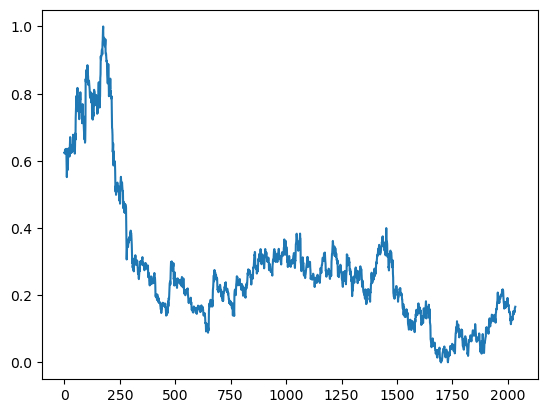

In [23]:
plt.plot(data_new)

# Building a model

In [24]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [25]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

Model Summary

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
21/21 [==============================] - 24s 472ms/step - loss: 0.0209 - val_loss: 0.0084
Epoch 2/100
21/21 [==============================] - 7s 342ms/step - loss: 0.0028 - val_loss: 7.7231e-04
Epoch 3/100
21/21 [==============================] - 7s 319ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 4/100
21/21 [==============================] - 7s 318ms/step - loss: 0.0015 - val_loss: 9.3250e-04
Epoch 5/100
21/21 [==============================] - 7s 311ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 6/100
21/21 [==============================] - 7s 311ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 7/100
21/21 [==============================] - 7s 312ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 8/100
21/21 [==============================] - 7s 314ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 9/100
21/21 [==============================] - 7s 314ms/step - loss: 0.0012 - val_loss: 9.5085e-04
Epoch 10/100
21/21 [==============================] - 6s 308ms/step - loss: 0.

In [28]:
# Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

16/16 [==============================] - 1s 69ms/step


In [29]:
# Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

# Evaluation

In [30]:
# Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

162.41066544685137

In [31]:
# Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

107.18322587531095